In [1]:
2+2

4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crime

## Questions


Your submission for this problem must include:
a) A crime forecast for York Region and a one of its Police Districts
- Identify the District most at risk of crime increase and why
- Integrate a publicly available dataset not provided to you into your crime forecast
model. Be creative and think of external factors that could impact crime.

## There are different priorities of crime,

    1. Emergency, 1
    2. High Priority, 2
    3. Medium Priority, 3
    --> There must be a low priority
    
There are many types of crime. We will generalize the crimes as 

    1. Criminal crime
    2. Non Criminal crime
    
    


In [3]:
crime_df = pd.read_excel("data/Calls_for_Service_2020-2022.xlsx")

my_data = crime_df.copy()

crime_df

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type
0,20200101,00:05:46,2,21,UNKNOWN TROUBLE
1,20200101,02:06:01,4,44,ASSAULT IN PROGRESS
2,20200101,00:37:32,5,55,FIRE
3,20200101,01:41:30,5,55,CHECK WELFARE
4,20200101,00:46:26,1,13,DOMESTIC VIOLENCE
...,...,...,...,...,...
410255,20221231,23:32:02,5,55,NOISE COMPLAINT
410256,20221231,22:35:53,2,22,BREAK IN COMMERCIAL
410257,20221231,21:31:15,2,22,DOMESTIC INCIDENT
410258,20221231,23:08:13,2,23,NOISE COMPLAINT


In [4]:
# percentage of missing values
print(crime_df.isnull().sum(axis=0))

# view rows with NaNs
crime_df[crime_df.isnull().any(axis=1)]

Call Date                0
Call Time (HH:MM:SS)     0
District                 0
Sector                   0
Call Type               20
dtype: int64


,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type
68356,20200710,17:25:07,2,21,NaN
93894,20200916,08:28:19,5,54,NaN
181805,20210603,17:42:00,4,46,NaN
183554,20210607,00:17:10,4,46,NaN
185013,20210611,11:45:52,5,51,NaN
185049,20210611,03:04:37,5,53,NaN
185724,20210613,22:31:31,4,41,NaN
186667,20210616,03:19:42,5,51,NaN
186796,20210616,21:59:28,1,13,NaN
187080,20210617,20:13:20,5,52,NaN


In [5]:
# drop 20 rows of NaNs
crime_df = crime_df.dropna(axis=0)
crime_df.shape

(410240, 5)

In [6]:
crime_df.dtypes

Call Date                int64
Call Time (HH:MM:SS)    object
District                object
Sector                  object
Call Type               object
dtype: object

In [7]:
crime_df['Call Date'] = pd.to_datetime(crime_df['Call Date'], format='%Y%m%d')
crime_df['year'] = crime_df['Call Date'].dt.year.apply(str)
crime_df['month'] = crime_df['Call Date'].dt.month_name().apply(lambda x: x[:3])
crime_df['day'] = crime_df['Call Date'].dt.day.apply(str)
crime_df.sample(10)

/var/folders/wj/gwqv8kfj18317lgnlmf6zypw0000gn/T/ipykernel_67325/1360405981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['Call Date'] = pd.to_datetime(crime_df['Call Date'], format='%Y%m%d')
/var/folders/wj/gwqv8kfj18317lgnlmf6zypw0000gn/T/ipykernel_67325/1360405981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['year'] = crime_df['Call Date'].dt.year.apply(str)
/var/folders/wj/gwqv8kfj18317lgnlmf6zypw0000gn/T/ipykernel_67325/1360405981.py:3: SettingWithCopyWarning: 
A value is

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type,year,month,day
117720,2020-11-22,13:51:29,1,13,THEFT IN PROGRESS,2020,Nov,22
392815,2022-11-19,22:11:49,1,11,ASSIST CITIZEN,2022,Nov,19
134229,2021-01-13,02:46:00,5,53,NOISE COMPLAINT,2021,Jan,13
107483,2020-10-24,23:22:23,4,42,NOISE COMPLAINT,2020,Oct,24
26689,2020-03-12,20:33:29,1,13,COMMERCIAL LANDLINE OR PAYPHONE- SECURITY TO C...,2020,Mar,12
314471,2022-05-21,13:58:48,5,53,DRIVING HAZARD,2022,May,21
175743,2021-05-18,10:01:28,1,12,THEFT,2021,May,18
377898,2022-10-15,17:24:06,3,31,ASSIST AMBULANCE,2022,Oct,15
339825,2022-07-18,09:20:41,5,54,MVC INJURY,2022,Jul,18
17287,2020-02-17,13:31:34,2,22,DOMESTIC CUSTODY ISSUES,2020,Feb,17


In [8]:
crime_df.dtypes

Call Date               datetime64[ns]
Call Time (HH:MM:SS)            object
District                        object
Sector                          object
Call Type                       object
year                            object
month                           object
day                             object
dtype: object

In [9]:
crime_df['Call Type']

0             UNKNOWN TROUBLE
1         ASSAULT IN PROGRESS
2                        FIRE
3               CHECK WELFARE
4           DOMESTIC VIOLENCE
                 ...         
410255        NOISE COMPLAINT
410256    BREAK IN COMMERCIAL
410257      DOMESTIC INCIDENT
410258        NOISE COMPLAINT
410259               IMPAIRED
Name: Call Type, Length: 410240, dtype: object

In [10]:
crime_df['Call Type']

0             UNKNOWN TROUBLE
1         ASSAULT IN PROGRESS
2                        FIRE
3               CHECK WELFARE
4           DOMESTIC VIOLENCE
                 ...         
410255        NOISE COMPLAINT
410256    BREAK IN COMMERCIAL
410257      DOMESTIC INCIDENT
410258        NOISE COMPLAINT
410259               IMPAIRED
Name: Call Type, Length: 410240, dtype: object

In [11]:
crime_df['District'].unique()

array([2, 4, 5, 1, 3, '~'], dtype=object)

In [12]:

unknown_dis_sec = crime_df[ 
                            (crime_df['District'] == '~') | 
                            (crime_df['Sector'] == '~')
                            ].copy()
unknown_dis_sec

,Call Date,Call Time (HH:MM:SS),District,Sector,Call Type,year,month,day
347,2020-01-02,15:22:13,~,~,CRC WALK IN ACCIDENT CALL,2020,Jan,2
880,2020-01-03,16:39:18,~,~,CRC WALK IN ACCIDENT CALL,2020,Jan,3
1511,2020-01-05,12:48:13,~,~,CRC WALK IN ACCIDENT CALL,2020,Jan,5
1594,2020-01-05,16:19:07,~,~,ASSIST P.O. OR OTHER AGENCY,2020,Jan,5
2121,2020-01-07,21:02:18,~,~,UNKNOWN TROUBLE,2020,Jan,7
...,...,...,...,...,...,...,...,...
408837,2022-12-28,10:31:10,~,~,THEFT,2022,Dec,28
409493,2022-12-30,11:29:42,~,~,ARU FRAUD,2022,Dec,30
409495,2022-12-30,08:53:50,~,~,BREAK IN RESIDENTIAL,2022,Dec,30
409509,2022-12-30,10:27:25,~,~,ARU FRAUD,2022,Dec,30


In [13]:
unknown_dis_sec.groupby('Call Date').count().shape

(798, 7)

In [14]:
unknown_dis_sec.shape[0] / crime_df.shape[0] * 100 

# about 1% of the force does not input their district and sector information
    # or this information is lost through some process

0.8414586583463338

In [15]:
# change ~ value to 0, maybe 0 has meaning
print(crime_df.shape)
crime_df.loc[crime_df['District'] == '~'] = np.nan
crime_df = crime_df.dropna(axis=0)
crime_df.shape

(410240, 8)


(406788, 8)

In [16]:
crime_df = crime_df.rename(columns={'Call Time (HH:MM:SS)' :'call_time'})
crime_df.head()

,Call Date,call_time,District,Sector,Call Type,year,month,day
0,2020-01-01,00:05:46,2,21,UNKNOWN TROUBLE,2020,Jan,1
1,2020-01-01,02:06:01,4,44,ASSAULT IN PROGRESS,2020,Jan,1
2,2020-01-01,00:37:32,5,55,FIRE,2020,Jan,1
3,2020-01-01,01:41:30,5,55,CHECK WELFARE,2020,Jan,1
4,2020-01-01,00:46:26,1,13,DOMESTIC VIOLENCE,2020,Jan,1


In [17]:
crime_df['call_time'] = crime_df['call_time'].apply(str)
crime_df['call_hour'] = crime_df['call_time'].apply(lambda x: x[:2])
crime_df

,Call Date,call_time,District,Sector,Call Type,year,month,day,call_hour
0,2020-01-01,00:05:46,2,21,UNKNOWN TROUBLE,2020,Jan,1,00
1,2020-01-01,02:06:01,4,44,ASSAULT IN PROGRESS,2020,Jan,1,02
2,2020-01-01,00:37:32,5,55,FIRE,2020,Jan,1,00
3,2020-01-01,01:41:30,5,55,CHECK WELFARE,2020,Jan,1,01
4,2020-01-01,00:46:26,1,13,DOMESTIC VIOLENCE,2020,Jan,1,00
...,...,...,...,...,...,...,...,...,...
410255,2022-12-31,23:32:02,5,55,NOISE COMPLAINT,2022,Dec,31,23
410256,2022-12-31,22:35:53,2,22,BREAK IN COMMERCIAL,2022,Dec,31,22
410257,2022-12-31,21:31:15,2,22,DOMESTIC INCIDENT,2022,Dec,31,21
410258,2022-12-31,23:08:13,2,23,NOISE COMPLAINT,2022,Dec,31,23


# Year Trend

<Axes: xlabel='year'>

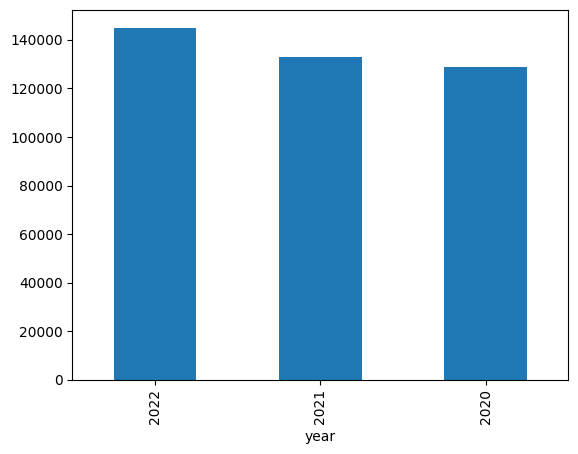

In [18]:
crime_df['year'].value_counts().plot(kind='bar',stacked=False)

In [19]:
# percent increase over each year
print(crime_df.groupby('year').count()['call_time'])
crime_df.groupby('year').count()['call_time'].pct_change()*100

year
2020    128902
2021    132791
2022    145095
Name: call_time, dtype: int64


year
2020         NaN
2021    3.017021
2022    9.265688
Name: call_time, dtype: float64

There have been a annual increae in crime.

2021 3% increase

2022 9% increase

# Month Trend

In [20]:
crime_df

,Call Date,call_time,District,Sector,Call Type,year,month,day,call_hour
0,2020-01-01,00:05:46,2,21,UNKNOWN TROUBLE,2020,Jan,1,00
1,2020-01-01,02:06:01,4,44,ASSAULT IN PROGRESS,2020,Jan,1,02
2,2020-01-01,00:37:32,5,55,FIRE,2020,Jan,1,00
3,2020-01-01,01:41:30,5,55,CHECK WELFARE,2020,Jan,1,01
4,2020-01-01,00:46:26,1,13,DOMESTIC VIOLENCE,2020,Jan,1,00
...,...,...,...,...,...,...,...,...,...
410255,2022-12-31,23:32:02,5,55,NOISE COMPLAINT,2022,Dec,31,23
410256,2022-12-31,22:35:53,2,22,BREAK IN COMMERCIAL,2022,Dec,31,22
410257,2022-12-31,21:31:15,2,22,DOMESTIC INCIDENT,2022,Dec,31,21
410258,2022-12-31,23:08:13,2,23,NOISE COMPLAINT,2022,Dec,31,23


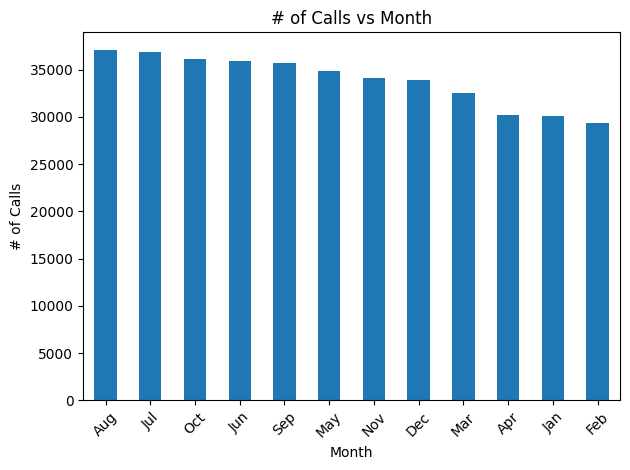

In [21]:
crime_df['month'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('# of Calls vs Month')
plt.xlabel("Month")
plt.ylabel("# of Calls")
plt.tight_layout()
plt.show()

The summer months have the most amount of calls.

# Military Time Trend

In [22]:
year_hour = crime_df.groupby(['year','call_hour']).count().reset_index()
year_hour = year_hour[['year','call_hour','call_time']]
year_hour

,year,call_hour,call_time
0,2020,00,4045
1,2020,01,3091
2,2020,02,2492
3,2020,03,2016
4,2020,04,1602
...,...,...,...
67,2022,19,7271
68,2022,20,6426
69,2022,21,6176
70,2022,22,5561


In [23]:
year_hour_pivot = year_hour.pivot_table(values='call_time', index = 'call_hour', columns='year', aggfunc='sum')
year_hour_pivot.head()

year,2020,2021,2022
call_hour,,,
00,4045,3972,4641
01,3091,3179,3457
02,2492,2681,3133
03,2016,2148,2563
04,1602,1963,2283


In [24]:
year_hour_pivot.index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='call_hour')

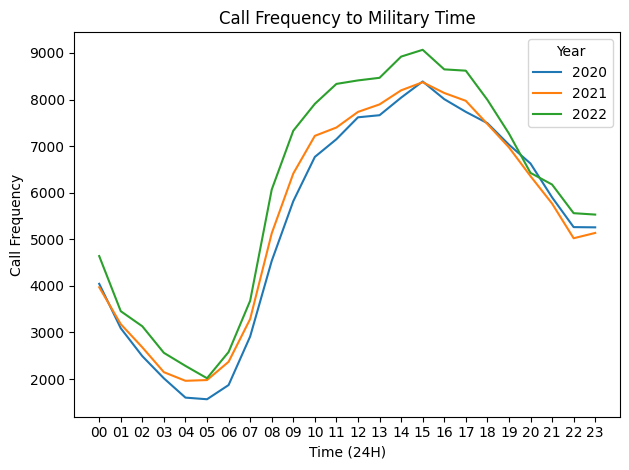

In [25]:
# make x ticks
time = [[],[]]

for x,y  in enumerate(year_hour_pivot.index):
    time[0].append(x)
    time[1].append(y)

# Unstacked bar chart
year_hour_pivot.plot(kind='line')
plt.title("Call Frequency to Military Time")
plt.legend( title= 'Year')
plt.xlabel('Time (24H)')
plt.ylabel('Call Frequency')
plt.xticks(time[0], time[1])
plt.tight_layout()
plt.show()

The least amount of calls occur over night between 3 to 6am.

The 

# Division Analysis

In [26]:
list(crime_df['Call Type'].unique())

['UNKNOWN TROUBLE',
 'ASSAULT IN PROGRESS',
 'FIRE',
 'CHECK WELFARE',
 'DOMESTIC VIOLENCE',
 'MVC INJURY',
 'SUSPICIOUS VEHICLE',
 'IMPAIRED',
 'INJURED PERSON',
 'SOUND OF GUNSHOTS',
 'THEFT',
 'MVC PROPERTY DAMAGE',
 'UNWANTED PERSON',
 'THEFT OF VEHICLE',
 'DOMESTIC KEEP THE PEACE',
 'ALARM PANIC',
 'DRIVING COMPLAINT',
 'CRC COMMUNICATIONS ACCIDENT CALL',
 'ASSIST AMBULANCE',
 'THREATS',
 'DISTURBANCE',
 'ALARM DEEMED CAUSED BY ENVIRONMENTAL CIRCUMSTANCES',
 'SILENT 911',
 'COMMERCIAL LANDLINE OR PAYPHONE - ALL OK',
 'ALARM CANCELLED WHILE ON LINE',
 'ASSAULT REPORT',
 'ASSIST CITIZEN',
 'SUICIDE ATTEMPT',
 'ASSIST P.O. OR OTHER AGENCY',
 'RECOVERED AUTO',
 'NOISE COMPLAINT',
 'DISPUTE',
 'KEEP THE PEACE',
 'SUSPICIOUS PERSON',
 'THEFT IN PROGRESS',
 'DOMESTIC FAMILY',
 'EMOTIONALLY DISTURBED PERSON',
 'CRC WALK IN ACCIDENT CALL',
 'ALARM HOLD UP',
 'PROPERTY DAMAGE',
 'INFORMATIONAL CALL',
 'WEAPONS CALL',
 'DRUGS',
 'DOMESTIC INCIDENT',
 'LIQUOR OFFENCE',
 'BREAK AND ENTER IN PR

Text(0.5, 1.0, '# of Calls by District')

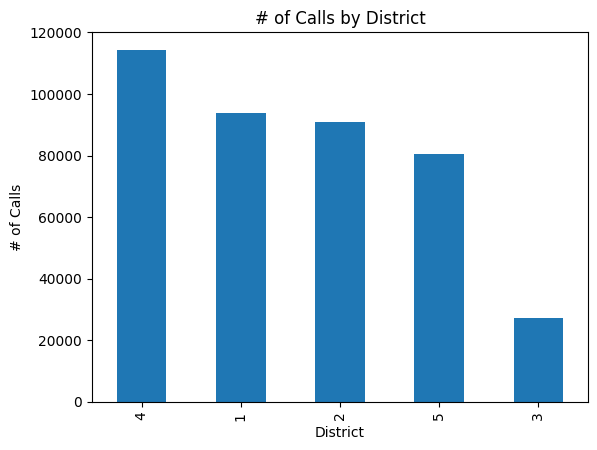

In [27]:
crime_df['District'].value_counts().plot(kind='bar')
plt.ylabel('# of Calls')
plt.title('# of Calls by District')

District 4 receives the most amount of total calls.

In [28]:
# make pivot table for district and year
year_district = crime_df.groupby(['year','District']).count().reset_index()[['year','District','call_time']]
year_district_pivot = year_district.pivot_table(values='call_time', index='District', columns='year')

# sort pivot table by total calls per district
year_district_pivot['total']=year_district_pivot.sum(axis=1)
year_district_pivot = year_district_pivot.sort_values(by='total',ascending=False)
year_district_pivot = year_district_pivot.drop('total',axis=1)

year_district_pivot

year,2020,2021,2022
District,,,
4,34128,37219,42976
1,31141,30376,32396
2,28767,30213,31849
5,25766,25682,29010
3,9100,9301,8864


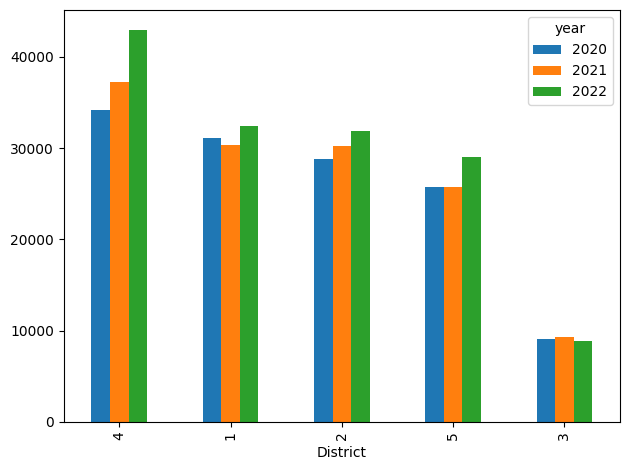

In [29]:
year_district_pivot.plot(kind='bar',stacked=False)
plt.tight_layout()

## Classify Priority Levels

In [30]:
priority_dict = {
    'UNKNOWN TROUBLE': 'high',
    'ASSAULT IN PROGRESS': 'high',
    'FIRE': 'high',
    'CHECK WELFARE': 'medium',
    'DOMESTIC VIOLENCE': 'high',
    'MVC INJURY': 'high',
    'SUSPICIOUS VEHICLE': 'medium',
    'IMPAIRED': 'high',
    'INJURED PERSON': 'medium',
    'SOUND OF GUNSHOTS': 'high',
    'THEFT': 'medium',
    'MVC PROPERTY DAMAGE': 'medium',
    'UNWANTED PERSON': 'medium',
    'THEFT OF VEHICLE': 'medium',
    'DOMESTIC KEEP THE PEACE': 'medium',
    'ALARM PANIC': 'high',
    'DRIVING COMPLAINT': 'low',
    'CRC COMMUNICATIONS ACCIDENT CALL': 'low',
    'ASSIST AMBULANCE': 'medium',
    'THREATS': 'medium',
    'DISTURBANCE': 'medium',
    'ALARM DEEMED CAUSED BY ENVIRONMENTAL CIRCUMSTANCES': 'low',
    'SILENT 911': 'medium',
    'COMMERCIAL LANDLINE OR PAYPHONE - ALL OK': 'low',
    'ALARM CANCELLED WHILE ON LINE': 'low',
    'ASSAULT REPORT': 'medium',
    'ASSIST CITIZEN': 'low',
    'SUICIDE ATTEMPT': 'high',
    'ASSIST P.O. OR OTHER AGENCY': 'medium',
    'RECOVERED AUTO': 'medium',
    'NOISE COMPLAINT': 'low',
    'DISPUTE': 'medium',
    'KEEP THE PEACE': 'low',
    'SUSPICIOUS PERSON': 'medium',
    'THEFT IN PROGRESS': 'high',
    'DOMESTIC FAMILY': 'medium',
    'EMOTIONALLY DISTURBED PERSON': 'medium',
    'CRC WALK IN ACCIDENT CALL': 'low',
    'ALARM HOLD UP': 'high',
    'PROPERTY DAMAGE': 'medium',
    'INFORMATIONAL CALL': 'low',
    'WEAPONS CALL': 'high',
    'DRUGS': 'high',
    'DOMESTIC INCIDENT': 'medium',
    'LIQUOR OFFENCE': 'low',
    'BREAK AND ENTER IN PROGRESS': 'high',
    'ALARM CANCELLED WHILE OFFICERS ENROUTE': 'low',
    'BREAK IN RESIDENTIAL': 'medium',
    'COMMERCIAL LANDLINE OR PAYPHONE- SECURITY TO CHECK': 'low',
    'MVC HIT AND RUN': 'medium',
    'SHOPLIFTING': 'medium',
    'HARASSMENT': 'medium',
    'SEX OFFENCE / OFFENDER': 'medium',
    'INSECURE PREMISE RESIDENTIAL': 'medium',
    'WANTED PERSON': 'high',
    'ARU HARASSMENT (PHONE CALLS)': 'medium',
    'MISSING ADULT': 'medium',
    'TRESPASSING': 'low',
    'BREACH OF CONDITIONS OR PROBATION': 'medium',
    'PROPERTY LOST': 'low',
    'HAZARDOUS MATERIALS': 'high',
    'PROPERTY FOUND': 'low',
    'BREAK IN COMMERCIAL': 'medium',
    'FRAUD INTAKE': 'medium',
    'SEXUAL ASSAULT': 'high',
    'FRAUD': 'medium',
    'TOW BYLAW & SPECIAL CONSTABLE': 'low',
    'THEFT OF VEHICLE IN PROGRESS': 'high',
    'ARU THEFT': 'medium',
    'IMPAIRED BY DRUG EVALUATION': 'high',
    'CRC OFFICER ACCIDENT REFERRAL (FINAL TYPE)': 'low',
    'ARU FRAUD': 'medium',
    'DRIVING HAZARD': 'low',
    'ELECTRONIC CRIME': 'medium',
    'MISSING CHILD': 'high',
    'TOWC VERIFIED & CLOSED': 'low',
    'VITAL SIGNS ABSENT': 'high',
    'MVC DEPARTMENTAL': 'medium',
    'HATE/BIAS MOTIVATED INCIDENT': 'high',
    'ABUSE CHILD': 'high',
    'DOMESTIC CUSTODY ISSUES': 'medium',
    'ANIMAL COMPLAINT': 'low',
    'MISSING PERSON FOUND': 'medium',
    'YOUTH COMPLAINT': 'low',
    'MISSING YOUTH': 'medium',
    'FALSE/ACCIDENTAL RESIDENTIAL 911 CALL': 'low',
    'MISSING VULNERABLE PERSON': 'high',
    'ROBBERY': 'high',
    'INDECENT ACT': 'medium',
    'ROBBERY FINANCIAL INSTITUTION': 'high',
    'ROBBERY COMMERCIAL': 'high',
    'TRANSPORT WEAPON': 'medium',
    'STALKING': 'medium',
    'ABUSE ELDER': 'high',
    'ACCIDENT INDUSTRIAL': 'medium',
    'ABANDONED VEHICLE': 'low',
    'INSECURE PREMISE COMMERCIAL': 'medium',
    'ALARM / UNVERIFIED': 'low',
    'PARKING COMPLAINT': 'low',
    'ER006 RESPONSE': 'medium',
    'TRAFFIC CONTROL': 'low',
    'ARU LOST PROPERTY': 'low',
    'COMMUNITY MOBILIZATION-ENGAGEMENT': 'low',
    'ROBBERY STREET LEVEL': 'high',
    'ABDUCTION': 'high',
    'MVC DEPARTMENTAL OUTSIDE POLICE': 'medium',
    'RIDE ALONG': 'low',
    'ARU PROPERTY DAMAGE': 'medium',
    'ROBBERY CAR JACKING': 'high',
    'STRIKES': 'medium',
    'ARU GAS DRIVE OFFS': 'low',
    'ALARM / VERIFIED': 'low',
    'SUSPECT APPREHENSION PURSUIT TRAFFIC': 'high',
    'PROJECT READY': 'medium',
    'PROWLER': 'medium',
    'ESCAPE/ELOPEE': 'medium',
    'MVC DEPARTMENTAL INJURIES': 'medium',
    'STANDARDIZED FIELD SOBRIETY TEST': 'medium',
    'ARMED BARRICADED PERSON': 'high',
    'BY LAW': 'low',
    'INTELLIGENCE REPORT': 'medium',
    'ANIMAL COMPLAINT - DOMESTIC ANIMAL': 'low',
    'AIRCRAFT': 'high',
    'ROBBERY HOME INVASION': 'high',
    'BOAT IN DISTRESS': 'medium',
    'REOPENING ONTARIO ACT/FORMERLY EMERG MEASURES ACT': 'low',
    'DEMONSTRATION, STRIKES, PICKET, PROTEST, RIOT': 'medium',
    'MVC FATALITY (FINAL CALL TYPE)': 'high',
    'ANIMAL COMPLAINT - LIVESTOCK ANIMAL': 'low',
    'TRANSLATION SERVICES': 'low',
    'SUSPECT APPREHENSION PURSUIT FOOT': 'high',
    'ACCIDENT FARM': 'medium',
    'MAJOR DISASTER': 'high',
    'STREET RACING EVENT': 'medium',
    'ANIMAL COMPLAINT - WILD ANIMAL': 'low',
    'SEARCH AND RESCUE DEPLOYMENT': 'medium',
    'CROWD MANAGEMENT DEPLOYMENT': 'medium',
    'TRANSPORT MEDICAL TEAM/HUMAN ORGAN': 'medium',
    'NEXT OF KIN NOTIFICATION': 'medium'
}

crime_df['priority'] = crime_df['Call Type'].apply(lambda x: priority_dict[x])
crime_df.head()

,Call Date,call_time,District,Sector,Call Type,year,month,day,call_hour,priority
0,2020-01-01,00:05:46,2,21,UNKNOWN TROUBLE,2020,Jan,1,00,high
1,2020-01-01,02:06:01,4,44,ASSAULT IN PROGRESS,2020,Jan,1,02,high
2,2020-01-01,00:37:32,5,55,FIRE,2020,Jan,1,00,high
3,2020-01-01,01:41:30,5,55,CHECK WELFARE,2020,Jan,1,01,medium
4,2020-01-01,00:46:26,1,13,DOMESTIC VIOLENCE,2020,Jan,1,00,high


In [31]:
# groupby district and priority
district_priority = crime_df.groupby(['District','priority']).count().reset_index()[['District','priority','call_time']]

# get pivot for unstacked plot
district_priority_pivot = district_priority.pivot(values='call_time',index='District', columns='priority')

# sort by total number of calls
district_priority_pivot['total']=district_priority_pivot.sum(axis=1)
district_priority_pivot = district_priority_pivot.sort_values(by='total',ascending=False)
district_priority_pivot = district_priority_pivot.drop('total',axis=1)

district_priority_pivot

priority,high,low,medium
District,,,
4,19431,30517,64375
1,17814,21013,55086
2,13444,22583,54802
5,13685,20228,46545
3,5183,5423,16659


<Axes: xlabel='District'>

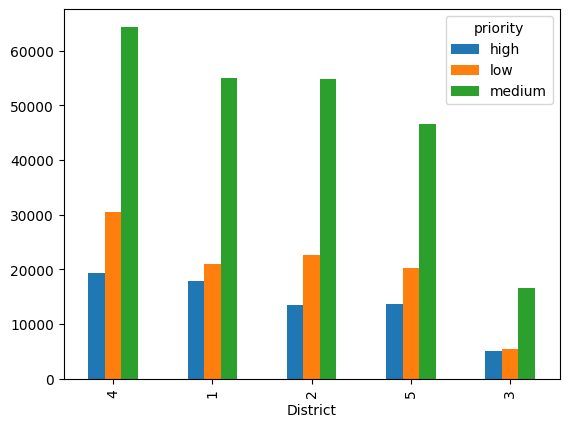

In [32]:
district_priority_pivot.plot(kind='bar', stacked=False)

# we see the district 4 has more calls in 
    # every priority level and overall

# End

In [33]:
len(crime_df['Call Type'].unique())

139

In [34]:
list(crime_df['Call Type'].unique())

['UNKNOWN TROUBLE',
 'ASSAULT IN PROGRESS',
 'FIRE',
 'CHECK WELFARE',
 'DOMESTIC VIOLENCE',
 'MVC INJURY',
 'SUSPICIOUS VEHICLE',
 'IMPAIRED',
 'INJURED PERSON',
 'SOUND OF GUNSHOTS',
 'THEFT',
 'MVC PROPERTY DAMAGE',
 'UNWANTED PERSON',
 'THEFT OF VEHICLE',
 'DOMESTIC KEEP THE PEACE',
 'ALARM PANIC',
 'DRIVING COMPLAINT',
 'CRC COMMUNICATIONS ACCIDENT CALL',
 'ASSIST AMBULANCE',
 'THREATS',
 'DISTURBANCE',
 'ALARM DEEMED CAUSED BY ENVIRONMENTAL CIRCUMSTANCES',
 'SILENT 911',
 'COMMERCIAL LANDLINE OR PAYPHONE - ALL OK',
 'ALARM CANCELLED WHILE ON LINE',
 'ASSAULT REPORT',
 'ASSIST CITIZEN',
 'SUICIDE ATTEMPT',
 'ASSIST P.O. OR OTHER AGENCY',
 'RECOVERED AUTO',
 'NOISE COMPLAINT',
 'DISPUTE',
 'KEEP THE PEACE',
 'SUSPICIOUS PERSON',
 'THEFT IN PROGRESS',
 'DOMESTIC FAMILY',
 'EMOTIONALLY DISTURBED PERSON',
 'CRC WALK IN ACCIDENT CALL',
 'ALARM HOLD UP',
 'PROPERTY DAMAGE',
 'INFORMATIONAL CALL',
 'WEAPONS CALL',
 'DRUGS',
 'DOMESTIC INCIDENT',
 'LIQUOR OFFENCE',
 'BREAK AND ENTER IN PR

In [35]:
crime_df.groupby(['District','Sector']).count().reset_index()
# there is only one sector in each district
# There is no combination of ~ with districts and sectors

,District,Sector,Call Date,call_time,Call Type,year,month,day,call_hour,priority
0,1,11,22704,22704,22704,22704,22704,22704,22704,22704
1,1,12,17917,17917,17917,17917,17917,17917,17917,17917
2,1,13,26982,26982,26982,26982,26982,26982,26982,26982
3,1,14,13239,13239,13239,13239,13239,13239,13239,13239
4,1,15,13071,13071,13071,13071,13071,13071,13071,13071
5,2,21,21774,21774,21774,21774,21774,21774,21774,21774
6,2,22,32736,32736,32736,32736,32736,32736,32736,32736
7,2,23,26550,26550,26550,26550,26550,26550,26550,26550
8,2,24,9769,9769,9769,9769,9769,9769,9769,9769
9,3,31,19735,19735,19735,19735,19735,19735,19735,19735


In [ ]:
breaks

# Public Data

In [ ]:
public_2020_2021_df =pd.read_csv("data/Historical_Community_Safety_Data.csv")
public_2021_2022_df = pd.read_csv("data/Year_to_Date_Community_Safety_Data_.csv")

In [ ]:
public_2021_2022_df['year'] = public_2021_2022_df['UniqueIdentifier'].apply(lambda x: x[:4])
ytd_2021 = public_2021_2022_df[
    public_2021_2022_df['year'] == '2021'
]
ytd_2021

In [ ]:
public_2020_2021_df['year'] = public_2020_2021_df['UniqueIdentifier'].apply(lambda x: x[:4])
hist_2021 = public_2020_2021_df[
    public_2020_2021_df['year'] == '2021'
]
hist_2021

In [ ]:
public_2020_2021_df.head()

In [ ]:
for i in public_2020_2021_df.columns:
    if i not in public_2021_2022_df.columns:
        print(i)

In [ ]:
for i in public_2021_2022_df.columns:
    if i not in public_2020_2021_df.columns:
        print(i)

In [ ]:
public_2021_2022_df = public_2021_2022_df.drop('rep_date',axis=1)
public_2021_2022_df

In [ ]:
all_col = public_2020_2021_df.columns

In [ ]:
public_2021_2022_df.join(public_2020_2021_df, on=all_col[:-1],how='inner')

In [ ]:
public_df.dtypes

In [ ]:
public_df['occ_date'] = pd.to_datetime(public_df['occ_date'], format='%Y/%m/%d %H:%M:%S%z')
public_df.dtypes

In [ ]:
public_df.head()

In [ ]:
public_df['year'] = public_df['occ_date'].dt.year.apply(str)
public_df['month'] = public_df['occ_date'].dt.month.apply(str)
public_df['day'] = public_df['occ_date'].dt.day.apply(str)
public_df['time'] = public_df['occ_date'].dt.time
public_df['date'] = public_df['year'] + '-' + public_df['month'] + '-' + public_df['day']

public_df = public_df[ 
    (public_df['year'] >= '2020') &
    (public_df['year'] <= '2022')
         ]


public_df.to_csv("./data/clean/clean_public_df.csv", index=False)

public_df

In [ ]:
public_df.year.unique()

In [ ]:
# count of cases per day
public_date_group = public_df.groupby('date').count()['X']
public_date_group

In [ ]:
# crimes group by date then case type
public_date_type_group = public_df.groupby(['date','case_type_pubtrans']).count()
public_date_type_group = public_date_type_group.reset_index()[['date','case_type_pubtrans','X']]
public_date_type_group